# Wing modeling

## NACA Airfoils

### Symmetrical 4-digit NACA foil
The formula for the shape of a NACA 00xx foil, with "x" being replaced by the percentage of thickness to chord, is:
\begin{equation}\label{eq:series4sym_yt}
    \begin{aligned}
        y_{t}=5t\,\left[0.2969{\sqrt {x}}-0.1260x-0.3516x^{2}+0.2843x^{3}-0.1015x^{4}\right]
    \end{aligned}
\end{equation}
* $x$ is the position along the chord from 0 to 1.00, (0 to 100%)
* $y_{t}$ is the half thickness at a given value of x (centerline to surface), and
* $t$ is the maximum thickness as a fraction of the chord (so t gives the last two digits in the NACA 4-digit denomination divided by 100).

In [1]:
from jupyter_code_template import *
from xfoil_toolbox import *

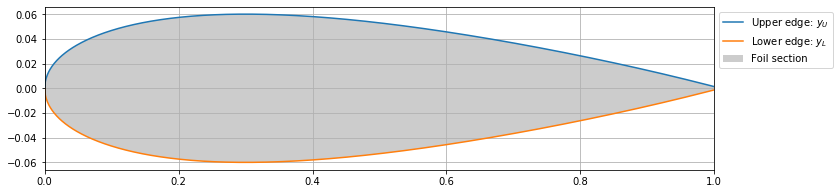

In [2]:
NACA = [0, 0, 12]
NACA_str = ''.join(map(str, NACA))
N = 1000
N, x, y_c, y_U, y_L = gen_NACA(series=NACA, N = N)

fig1, ax1 = plt.subplots(1, 1, figsize = (12, 3))
symmetric_foil_plt(fig1, ax1, N, x, y_c, y_U, y_L, NACA)

### Cambered 4-digit NACA foil
The simplest asymmetric foils are the NACA 4-digit series foils, which use the same formula as that used to generate the 00xx symmetric foils, but with the line of mean camber bent. The formula used to calculate the mean camber line is:

\begin{equation}\label{eq:series4cambered_yc}
    \begin{aligned}
        y_{c} =
        \begin{cases}
            \frac{m}{p^2}\left( 2p\left(\frac{x}{c}\right)-\left(\frac{x}{c}\right)^2 \right), & 0\leq x \leq pc\\
            \frac{m}{(1-p)^2}\left( (1-2p)+2p\left( \frac{x}{c}\right)-\left(\frac{x}{c}\right)^2 \right), & pc \leq x \leq c\\
        \end{cases}
    \end{aligned}
\end{equation}
* $m$ is the maximum camber ($100 m$ is the first of the four digits),
* $p$ is the location of maximum camber ($10 p$ is the second digit in the NACA xxxx description).

For this cambered airfoil, because the thickness needs to be applied perpendicular to the camber line, the coordinates $(x_U,y_U)$ and $(x_L,y_L)$, of respectively the upper and lower airfoil surface, become:
\begin{align}
    x_U &= x-y_t \sin(\theta), & y_U &= y_c +y_t\cos(\theta)\\
    x_L &= x+y_t \sin(\theta), & y_L &= y_c -y_t\cos(\theta)\\
\end{align},
where
\begin{equation}
    \theta = \arctan\left(\frac{dy_c}{dx}\right)\\
\end{equation}
\begin{equation}
    \begin{aligned}
        \frac{dy_c}{dx} =
        \begin{cases}
            \frac{2m}{p^2} \left( p-\frac{x}{c}\right), & 0\leq x \leq pc\\
            \frac{m}{(1-p)^2}\left( p-\frac{x}{c}\right), & pc \leq x \leq c\\
        \end{cases}
    \end{aligned}
\end{equation}

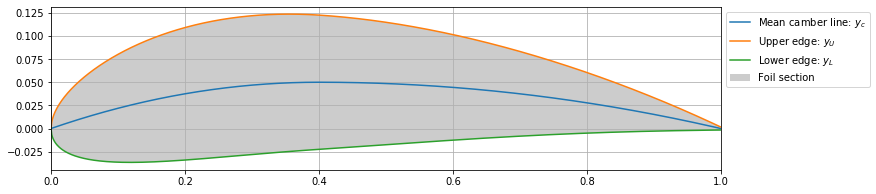

In [4]:
from jupyter_code_template import *
# from xfoil_toolbox import *
NACA = [5, 4, 15]
N = 1000

N, x, y_c, y_U, y_L = gen_NACA(series=NACA, N = N)

fig2, ax2 = plt.subplots(1, 1, figsize = (12, 3))

cambered_foil_plt(fig2, ax2, N, x, y_c, y_U, y_L, NACA)

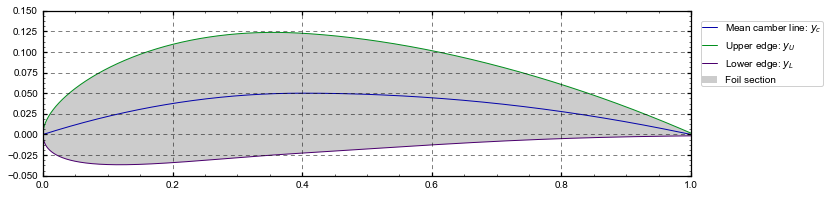

In [29]:
from jupyter_code_template import *
NACA = [5, 4, 15]
N = 1000

N, x, y_c, y_U, y_L = gen_NACA(series=NACA, N = N)

fig2, ax2 = plt.subplots(1, 1, figsize = (12, 3))

cambered_foil_plt(fig2, ax2, N, x, y_c, y_U, y_L, NACA)

## Reynolds Number Calculator
(shamelessly stolen from http://airfoiltools.com/calculator/reynoldsnumber?MReNumForm%5Bvel%5D=28&MReNumForm%5Bchord%5D=0.2&MReNumForm%5Bkvisc%5D=1.5111E-5&yt0=Calculate)

\begin{equation}
\operatorname{Re}=\frac{\rho v l}{\mu}=\frac{v l}{\nu}
\end{equation}
Where:
\begin{equation}
    \begin{array}{l}
        {v=\text { velocity of the fluid }} \\ 
        {l=\text { The characteritics length, the chord width of an airfoil }} \\ 
        {\rho=\text { The density of the fluid }} \\ 
        {\mu=\text { The dynamic viscosity of the fluid }} \\ 
        {\nu=\text { The kinematic viscosity of the fluid }}
    \end{array}
\end{equation}

In [3]:
def Re_N(v = 10, c = 0.1, vis = 1.5111e-5, kph = False):
    """
    Calculates the Reynold Number.
    
    -v= velocity of the fluid [m/s] or [km/h] if kph = True
    -c= The characteritics length, the chord width of an airfoil [m]
    -vis= The kinematic viscosity of the fluid [m^2/s]
    -kph= boolean, True if v is measured in kph
    
    Example kinematic viscosity values for air and water at 1 atm and various temperatures.   
        m2/s        |°C
        ---------------
        1.2462e-5   |-10
        1.3324e-5   | 0
        1.4207e-5   | 10
        1.5111e-5   | 20
    
    """
    if(kph):
        v = v/3.6
    return v*c/vis

def Ma(c = 340.3, v = 10, c_kph = False, v_kph = False):
    """
    Calculates the Mach number.
    -c speed of sound [m/s].
    -v fluid velocity [m/s]
    -c_kph or v_kph, select True if values are in units of km/h
    """
    if(c_kph): c = c/3.6
    if(v_kph): v = v/3.6
    
    return v/c
print(Ma())

0.029385836027034967


# xfoil 0.0.16 testing

In [2]:
from jupyter_code_template import *
from xfoil import XFoil
from xfoil.test import naca0012
from xfoil_toolbox import *

In [4]:
v = 100 #cruise speed [kph]
c = 0.2 #chord length [m]
R = Re_N(v = v, c = c, kph = True)
M = Ma(v = v, v_kph = True)
print(R, M)

xf = XFoil()
xf.airfoil = naca0012
xf.Re = R
xf.max_iter = 200
xf.M = M
a, cl, cd, cm, co = xf.aseq(0, 10, 0.05)
print("Done")

367649.76213060395 0.08162732229731935


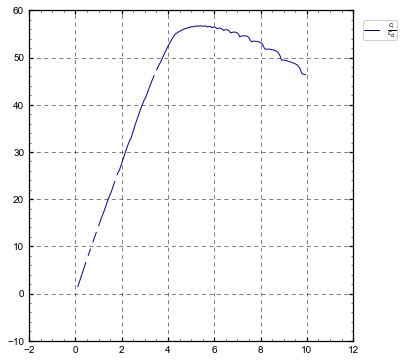

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
ax.plot(a, cl/cd, label = r"$\frac{c_l}{c_d}$")
ax.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

In [2]:
from jupyter_code_template import *
from xfoil import XFoil
from xfoil.model import Airfoil
from xfoil_toolbox import *

In [4]:
v = 100 #cruise speed [kph]
c = 0.3 #chord length [m]
R = Re_N(v = v, c = c, kph = True)
M = Ma(v = v, v_kph = True)
print(R, M)

551474.643195906 0.08162732229731935


In [5]:
x, y = xfoil_foilgen([4,4,13], 150)
nacashape = Airfoil(x, y)

xf = XFoil()
xf.airfoil = nacashape
xf.Re = R
xf.max_iter = 200
xf.M = M

In [12]:
alpha, cl, cd, cm, co = xf.aseq(-5, 10, 0.1)
print("Done Sequencing")

Done Sequencing


In [13]:
# alpha = smoothing(alpha)
# cl = smoothing(cl)
# # print(cl)
# cd = smoothing(cd)
# # print(cd)
print(cl)

[-0.07202628 -0.06118479 -0.05018928 -0.03924833 -0.02830347 -0.01732076
 -0.00637294  0.00460042  0.01560241  0.02657452  0.03756597  0.04855948
  0.0595239   0.07048565  0.08150738  0.09243771  0.10348518  0.11440418
  0.12538722         nan  0.14731142  0.15826529  0.16921489  0.18016078
  0.1911169   0.20206194         nan  0.22391948         nan  0.24570122
  0.2565878   0.26744959  0.27829099  0.28913283  0.29995906  0.31075475
  0.32154143  0.33233219  0.34309736  0.35383329         nan  0.37527034
  0.3859621   0.39659938  0.40711668  0.41753545  0.42777461  0.4378278
  0.44775647  0.45762697  0.46736121  0.47685754  0.48599467  0.49482101
  0.50299621  0.5109998   0.52177095  0.53820628  0.55640662  0.57478386
  0.59392893  0.60591483  0.61570132  0.62556148  0.63552791  0.64542824
  0.65553498  0.66559947  0.67572504  0.68592727  0.69608593  0.70639932
  0.71659911  0.72699779  0.73724294  0.74770248  0.75799578  0.76849157
  0.77883595  0.78934228  0.79974145  0.81022769  0.

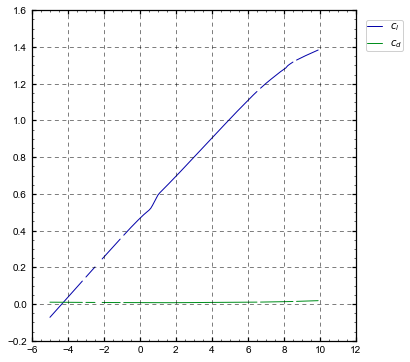

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
# ax.plot(alpha, cl/cd, label = r"$\frac{c_l}{c_d}$")
ax.plot(alpha, cl, label = r"$c_l$")
ax.plot(alpha, cd, label = r"$c_d$")
ax.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

## UAV design ideas

* Foam structure
* Skin
* Mould for rapid deployment
  * JIG for foam cutting instead?
* Pixhawk brain
  * Definitely --> I shoud probably source one
* AI autopilot
  * Long term goal, integrate with pixahawk
* Predefined wiring harness
  * Obviously
* Parachute for landing
  * Yes
* Sled takeoff
  * Yes
  * Compressed air?
    * Not right now.
  * Elastic bands seem better.
  * VTOL sled? Seems cool, why not?

* Design challenge:
  * Design for scaling
  * Rapid prototyping
  * Rapid deployment
  * Minimal moving parts


* Pitch control
* Torque vectoring for pitch control
* Tail surface?
* Linear motor over centre of gravity
* Up-cambered wings
* Reaper and Predator drones really caught my eye. These were basically just glider wings, set back on the fuselage to counter the weight of the camera equipment and sensors in the nose. The anhedral tail surfaces on the Predator are intended to assist in the prevention of prop-strike during take-off and landing – plus they look cool.


* Air time: 10\~min
* SDR & GPU-Jetson
  * 15 W to 20 W (achievable)
* GPS
* Mini-airship
* Does it need to move a distance
  * Tethering is difficult
  * Yes we want it to move
* Low transmission power in RF, 100 mW cap (to be revised)
* Try to get better power consumption estimates
  * best GPU?
  * radar
  * SDR

# Jamming System UAV Requirements
**2019/02/28**

* SDR Type: Nuand BladeRF 2.0
* SDR Dimensions: 12 cm (17 cm with amplifiers) x 8 cm x 2.5 cm
* SDR Power:(5 V ; 1 A) $\implies$ 5 .0 W 
* SDR External  Amplifier Power:
  * 2 x PA: (2 x 0.3 W) $\implies$ 0.6 W
  * 2 x LNA: (2 x 0.45 W) $\implies$ 0.9 W
* Jammer Wingspan Requirements: 2.5 m
* SDR Mass (with amplifiers and cover): 350 g
* Odroid Processor Power $\implies$ 20 W
* Odroid Dimensions: 7 cm x 9 cm x 3 cm
* Odroid Weight: 100 g
* RG-58 Coaxial Cable: 37 g / m

## Rietfontein Anti-poaching

* Rietfontein Anti-poaching
  * Need a drone.
  * We can test at the Rietfontein
  * We need to get specs
  * Circumference of 30 km
  * Diameter of 8 km

## Design requirements
* UAV wing tips
* Reflexed Wing tips
* Fibre glass manufacturing don't so small jobs
* They also don't 


## Build Techniques
* Balsa
   * Hard to build
   * Fragile
   * Hard to repair
* Folded foam board
  * Quick cheap and easy
  * Not much in the way of accuracy
* Coragated platic board
  * indestrutable
  * inaccurate
* Foam board
  * Hot wire cutter
  * really fragile
    * packing tape
    * laminate sheet
    * fibre glass onto foam (promising)

## Tutorials
* https://www.instructables.com/id/Black-Eagle-aerial-mapping-UAV/
* https://www.youtube.com/watch?v=Xafg-o83L94
* https://www.robotshop.com/community/tutorials/show/how-to-make-a-drone-uav-lesson-8-airplanes

## Genetic Algorithm implementation

### Basic GA tutorial
* https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6 \cite{gad_genetic_2018}

In [1]:
def cal_pop_fitness(equation_inputs, pop):
     # Calculating the fitness value of each solution in the current population.
     # The fitness function calculates the sum of products between each input
     # and its corresponding weight.
     fitness = np.sum(pop*equation_inputs, axis=1)
     return fitness

def select_mating_pool(pop, fitness, num_parents):

    # Selecting the best individuals in the current generation as parents
    # for producing the offspring of the next generation.

    #generate empty parent population array
    parents = np.empty((num_parents, pop.shape[1]))

    #iterate through the number of parents
    for parent_num in range(num_parents):
        #find which memper had max fitness
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]

        #choose the individual from the previous population with the maximum
        #fitness to be a parent for the next generation.
        parents[parent_num, :] = pop[max_fitness_idx, :]

        #set the current maximum fitness to be some small value so that on the
        #next iteration of the loop the next best individual will be selected
        #i.e. take this one out of the running
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):

    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents.
    #Usually, it is at the center.
    crossover_point = int(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):

    # Mutation changes a single gene in each offspring randomly.

    for idx in range(offspring_crossover.shape[0]):

        # The random value to be added to the gene.

        random_value = np.random.uniform(-1.0, 1.0, 1)

        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value

    return offspring_crossover

In [2]:
from jupyter_code_template import *

#Inputs to the function to be minimised
equation_inputs = [4,-2,3.5,5,-11,-4.7]

#parameters to be optimised
N_w = len(equation_inputs)

#the number of individuals in a population
N_ind = 8

#the population shape
pop_shape = (N_ind, N_w)

#seed the population
new_pop = np.random.uniform(-4.0, 4.0, size = pop_shape)

#the number of generations
N_gen = 10
new_parents_mating = 4
fit_arr = []
for gen in range(N_gen):
    fitness = cal_pop_fitness(equation_inputs, new_pop)
    parents = select_mating_pool(new_pop, fitness, new_parents_mating)
    offspring_crossover = crossover(parents, offspring_size = (pop_shape[0]-parents.shape[0], N_w))
    offspring_mutation = mutation(offspring_crossover)
    new_pop[0:parents.shape[0], :] = parents
    new_pop[parents.shape[0]:, :] = offspring_mutation
    fit = max(sum(new_pop*equation_inputs, axis=1))
    fit_arr = np.append(fit_arr, fit)

# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_pop)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == max(fitness))

print("Best solution : ", new_pop[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

fig, ax = plt.subplots(1, 1, figsize = (12, 3))
ax = config_axis(ax, Eng = False)
ax.plot(fit_arr)
plt.show()

Best solution :  [[[ 3.17667176 -0.35600885  1.92396877  2.49634592 -6.41061891
   -2.64615371]]]
Best solution fitness :  [115.58805545]


<Figure size 3600x900 with 1 Axes>

### Naive GA with aeropy


In [37]:
from jupyter_code_template import *
from numpy.random import randint
np.random.seed(20190321)

N_ind = 10
N_params = 3
pop = np.empty((N_ind, 3), int)
#seed population
for i in range(N_ind):
    pop[i, :] = [randint(0, 7, None, int), randint(0, 7, None, int), randint(10, 20, None, int)]


array([[ 6,  3, 19],
       [ 2,  2, 18],
       [ 4,  2, 16],
       [ 1,  0, 18],
       [ 2,  3, 15],
       [ 5,  1, 17],
       [ 0,  6, 15],
       [ 0,  1, 17],
       [ 3,  4, 15],
       [ 4,  6, 17]])

# To Do
1. Build a python script
  1. Build a parts-list with density, volume in google sheets (including batteries and motors)
    * calculates payload
  2. Build a plane geometry list that takes in wing geometry, fuselage geometry, densities (using EPP or EPO)
    * calculates mass
  3. outputs minimum required lift
  4. Given lift and drag what is the minimum power needed
    * With this power, motor and batteries, how many batteries do we need?
  5. Given some available lift, and some geometry, what's our payload?
6. Find best available batteries.
7. Best motors

* Build one of each
* Design for foam jig done
* Flight Controller
  * not APM? https://www.ardupilot.co.uk/
    * iNav https://github.com/iNavFlight/inav/wiki
  * autopilot
  * return to home
  * datalogging
*

# Input from the aeronautics engineer
1.  What are the steps to take?
  1. What planiform is best for low speed, endurance (surveying work)
  2. What are the various speeds we need to design for? Cruise speed, dive speed, turning angle, stall speed
    * What are the speeds a function of?
  3. For a given planiform geormetry, what are the steps to take for designing for stability, i.e., where should the centre of mass be relative to the centre of lift?
  
1. Glider:
 1. Endurance: Speed->Reynolds->Airfoil groups
 2. Planiform: 
  * Aspect ratio: 6 to 8
  * No sweep
  * Cl ranges for a glider, how that contributes a glider, and effects lift
  * Small ranges of angle of attack
  * Forward sweep is very efficient, but less stable
  * Backward sweep is more stable
  * C_m Approaches to C_l
  * Start with tail, no sweep, itterate.
  * Inverted delta -> better stability-> better wing loading
  * Wing tips just use one that works
    * smooth as possible interface
    * below the wingtip is unnecessary
  * RC Models
 3. Tail
   * Symmetrical
   * Small
 4. Reynolds number:
   * Below 500000 is low
 5. 
   * C_l coefficient of lift for aerofoil
   *

## Reynolds Number (Re), fluid density ($\rho$), kinematic viscosity ($v$), and dynamic viscosity ($\mu$)

\begin{align}
    \text{Re}&=\frac{u c}{v}\\
    &=\frac{\rho u c}{\mu}
\end{align}
where: 
* $u$ is the flow speed relative to the body [m/s].
* $v$ is the kinematic viscosity [m$^2$/s].
* $\mu$ is the dynamic viscosity [kg/(ms)].
* $\rho$ is the fluid density [kg/m$^{3}$].
* $c$ is the chord length.

### Approximate values at 1atm for air.
| Temp 	| Density (ρ) 	| Dynamic Viscosity (μ) 	| Kinematic Viscosity (v) 	|
|------	|-------------	|-----------------------	|-------------------------	|
| ◦c   	| kg/m$^3$       	| x10$^{-5}$kg/m.s           	| x10$^{-5}$m2/s               	|
| -20  	| 1.3958      	| 1.6222                	| 1.1622                  	|
| -15  	| 1.3687      	| 1.6478                	| 1.2039                  	|
| -10  	| 1.3426      	| 1.6731                	| 1.2462                  	|
| -5   	| 1.3175      	| 1.6982                	| 1.289                   	|
| 0    	| 1.2933      	| 1.7231                	| 1.3324                  	|
| 5    	| 1.2699      	| 1.7478                	| 1.3763                  	|
| 10   	| 1.2474      	| 1.7722                	| 1.4207                  	|
| 15   	| 1.2257      	| 1.7965                	| 1.4657                  	|
| 20   	| 1.2047      	| 1.8205                	| 1.5111                  	|
| 25   	| 1.1845      	| 1.8444                	| 1.5571                  	|
| 30   	| 1.1649      	| 1.868                 	| 1.6036                  	|
| 35   	| 1.1459      	| 1.8915                	| 1.6507                  	|
| 40   	| 1.1275      	| 1.9148                	| 1.6982                  	|

# References

<mark> <b>The bib file biblio.bib was not found

</b> </mark>(<a id="cit-gad_genetic_2018" href="#call-gad_genetic_2018">?</a>) !! _This reference was not found in biblio.bib _ !!

